## 날 것의 파일과 인코딩된 파일을 다운로드 받기

In [33]:
#그냥 실행시키시면 자동으로 다운로드 됩니다.
import os
import tqdm
files = {"X_val_enc":"1IAvlfsYw13kC6jVUj6jOdqSAwBNQLS3G",
         "X_train_enc":"1rPCnDqif5epOr-F2ypwnoUX9k8TcO4Ia",
         "X_test_enc":"1ctp5kNmNzljgsi1W8X4W7gN3o7y6flUJ",
        "X_val":"1-7CBfLwKpPAqFqA1vq8EZJe1olGw3zsu",
         "X_train":"1-18adV66ZrHnpzsfer6MfS7HU71CT0Cf",
         "X_test":"1-9vV59f_kCgTuh-P-_Nq5uSHzshBCpvT",
         "y_train":"1LH2LoFZg8YgjBHCNvPEGD_ltROLohaYI",
         "y_test":"1-4nHZFlaHKshaa_CE6w36z4gL9bVrz6k",
         "y_val":"1-1N-5ilxadcYtWguUPAS21BbfzUiLgDl"}
print("Now starting To download!")
for name, idx in tqdm.tqdm_notebook(files.items()):
    os.system(f'wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id={idx}" -O- | sed -rn "s/.*confirm=([0-9A-Za-z_]+).*/\1\n/p")&id={idx}" -O {name}.npy && rm -rf /tmp/cookies.txt')

Now starting To download!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


# File Import

In [34]:
import numpy as np

X_auto_val = np.load("/content/X_val_enc.npy")
X_auto_test = np.load("/content/X_test_enc.npy")
X_auto_train = np.load("/content/X_train_enc.npy")

X_val = np.load("/content/X_val.npy")
X_test = np.load("/content/X_test.npy")
X_train = np.load("/content/X_train.npy")

y_val = np.load("/content/y_val.npy")
y_test = np.load("/content/y_test.npy")
y_train = np.load("/content/y_train.npy")

In [35]:
X_auto_train.shape

(153, 256)

In [49]:
## Evaluation Function

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def evaluation(y_true, y_pred, model_name = "Temp Name"): 
    print(classification_report(y_true, y_pred))

    plt.figure(figsize=[8,8])
    plt.title(model_name+" confusion matrix", fontsize = 20)
    labels = ["Positive","Negative"]
    conf_m = pd.DataFrame(confusion_matrix(y_true, y_pred), index = labels, columns = labels)
    ax = sns.heatmap(conf_m, cmap="Blues", annot=True,fmt='5')
    plt.yticks(va="center")
    plt.savefig("/content/"+model_name+"_confusion_matrix.pdf")
    plt.savefig("/content/"+model_name+"_confusion_matrix.jpg")

def AUROC_Curve(y_true, y_pred_softmax, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_softmax)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name)
    plt.legend(loc="lower right")
    plt.savefig("/content/"+model_name+"_auroc_curve.pdf")
    plt.savefig("/content/"+model_name+"_auroc_curve.jpg")
    plt.show()

# SVM

In [37]:
import sklearn.svm as svm

### 전처리된 데이터

#### linear model

In [38]:
svm_linear =svm.SVC(kernel = 'linear')

In [39]:
svm_linear.fit(X_auto_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
from sklearn.model_selection import GridSearchCV

#파라미터를 설정합니다
parameters={'C':(100, 1e3,1e4,1e5), 'gamma':(1e-08,1e-7, 1e-6,1e-5)}
grid_search=GridSearchCV(svm_linear, parameters, n_jobs=-1, cv=3)

In [41]:
grid_search.fit(X_auto_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': (100, 1000.0, 10000.0, 100000.0),
                         'gamma': (1e-08, 1e-07, 1e-06, 1e-05)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
y_pred = grid_search.predict(X_auto_test)

In [43]:
y_pred_softmax = grid_search.decision_function(X_auto_test)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.43      0.50      0.46         6

    accuracy                           0.65        20
   macro avg       0.60      0.61      0.60        20
weighted avg       0.67      0.65      0.66        20



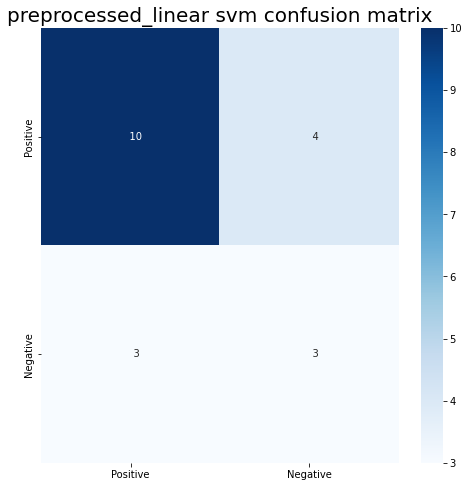

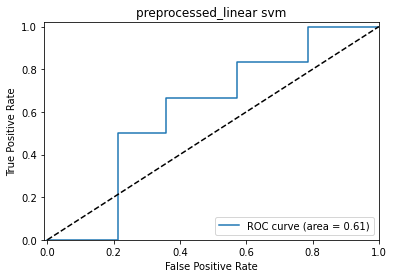

In [50]:
evaluation(y_test, y_pred, "preprocessed_linear svm")
AUROC_Curve(y_test, y_pred_softmax, "preprocessed_linear svm")

In [51]:
processed_train_test = (X_auto_train, X_auto_test, y_train, y_test)
np.save("SVM_processed_train_test.npy", processed_train_test)

### 기존데이터

In [52]:
x_sample, nx, ny = X_train.shape
X_train_dataset = X_train.reshape((x_sample, nx*ny))

In [53]:
xtest_sample, nxtest, nytest = X_test.shape
X_test_dataset = X_test.reshape((xtest_sample, nxtest*nytest))

In [54]:
svm_linear.fit(X_train_dataset, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
grid_search.fit(X_train_dataset, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': (100, 1000.0, 10000.0, 100000.0),
                         'gamma': (1e-08, 1e-07, 1e-06, 1e-05)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
y_pred_ = grid_search.predict(X_test_dataset)

In [60]:
y_pred_softmax_ = grid_search.decision_function(X_test_dataset)

In [61]:
y_pred_softmax

array([ -1.14123233,  -1.57820223,  -2.09977944,  -0.99399722,
         0.18853569,   0.0233753 ,   0.5314461 ,  -6.62975905,
        -2.81724443,  -0.87912769,  -2.97255691,  -0.84608172,
        -1.45879414,  -3.17286091,  -0.09026216, -12.10589666,
         0.04298553,   0.57269157,   2.19093451,   0.0905    ])

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.20      0.17      0.18         6

    accuracy                           0.55        20
   macro avg       0.43      0.44      0.44        20
weighted avg       0.53      0.55      0.54        20



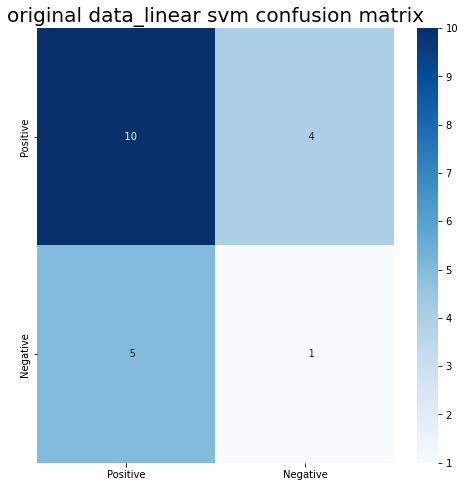

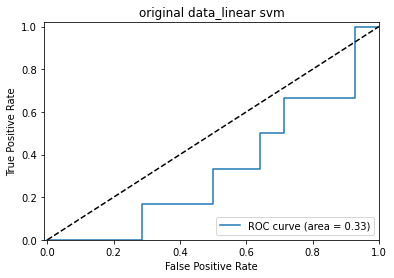

In [58]:
evaluation(y_test, y_pred_, "original data_linear svm")
AUROC_Curve(y_test, y_pred_softmax_, "original data_linear svm")

In [59]:
original_train_test = (X_auto_train, X_auto_test, y_train, y_test)
np.save("SVM_original_train_test.npy", original_train_test)